In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv')

In [2]:
df.head()

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no


In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le = LabelEncoder()

In [5]:
df.region = le.fit_transform(df['region'])
df.sex = le.fit_transform(df['sex'])
df.smoker = le.fit_transform(df['smoker'])

In [6]:
df.head()

,region,age,sex,bmi,children,smoker
0,3,19,0,27.900,0,1
1,2,18,1,33.770,1,0
2,2,28,1,33.000,3,0
3,1,33,1,22.705,0,0
4,1,32,1,28.880,0,0


In [7]:
x = df.drop('smoker', axis=1)

In [8]:
y = df['smoker']

In [9]:
from sklearn.model_selection import train_test_split as tts
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.30)

In [10]:
xtrain.shape

(936, 5)

In [11]:
xtest.shape

(402, 5)

In [12]:
ytrain.shape

(936,)

In [13]:
ytest.shape

(402,)

In [14]:
xtrain.head()

,region,age,sex,bmi,children
1142,2,52,0,24.860,0
601,1,51,1,31.635,0
127,3,52,0,37.400,0
58,2,53,0,22.880,1
476,0,24,1,28.500,0


In [15]:
ytrain.head()

1142    0
601     0
127     0
58      1
476     1
Name: smoker, dtype: int32

# Applying the DecisionTreeClassifier model

In [16]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [17]:
clf.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [19]:
 clf.score(xtest,ytest)

0.664179104477612

In [20]:
 clf.score(xtrain,ytrain)

1.0

In [21]:
from sklearn import tree
import matplotlib.pyplot as plt

In [28]:
x_features = x.columns

[Text(412.9981681034483, 954.018, 'sex <= 0.5\ngini = 0.335\nsamples = 936\nvalue = [737, 199]'),
 Text(132.64525862068967, 905.094, 'bmi <= 24.773\ngini = 0.293\nsamples = 455\nvalue = [374, 81]'),
 Text(54.35689655172414, 856.1700000000001, 'bmi <= 24.653\ngini = 0.414\nsamples = 89\nvalue = [63, 26]'),
 Text(50.508620689655174, 807.246, 'bmi <= 21.898\ngini = 0.4\nsamples = 87\nvalue = [63, 24]'),
 Text(28.862068965517242, 758.322, 'bmi <= 21.68\ngini = 0.461\nsamples = 36\nvalue = [23, 13]'),
 Text(19.24137931034483, 709.398, 'children <= 1.5\ngini = 0.391\nsamples = 30\nvalue = [22, 8]'),
 Text(11.544827586206896, 660.474, 'region <= 0.5\ngini = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(7.696551724137931, 611.55, 'bmi <= 20.045\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(3.8482758620689657, 562.626, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(11.544827586206896, 562.626, 'bmi <= 20.378\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(7.696551724137931, 513.702, 

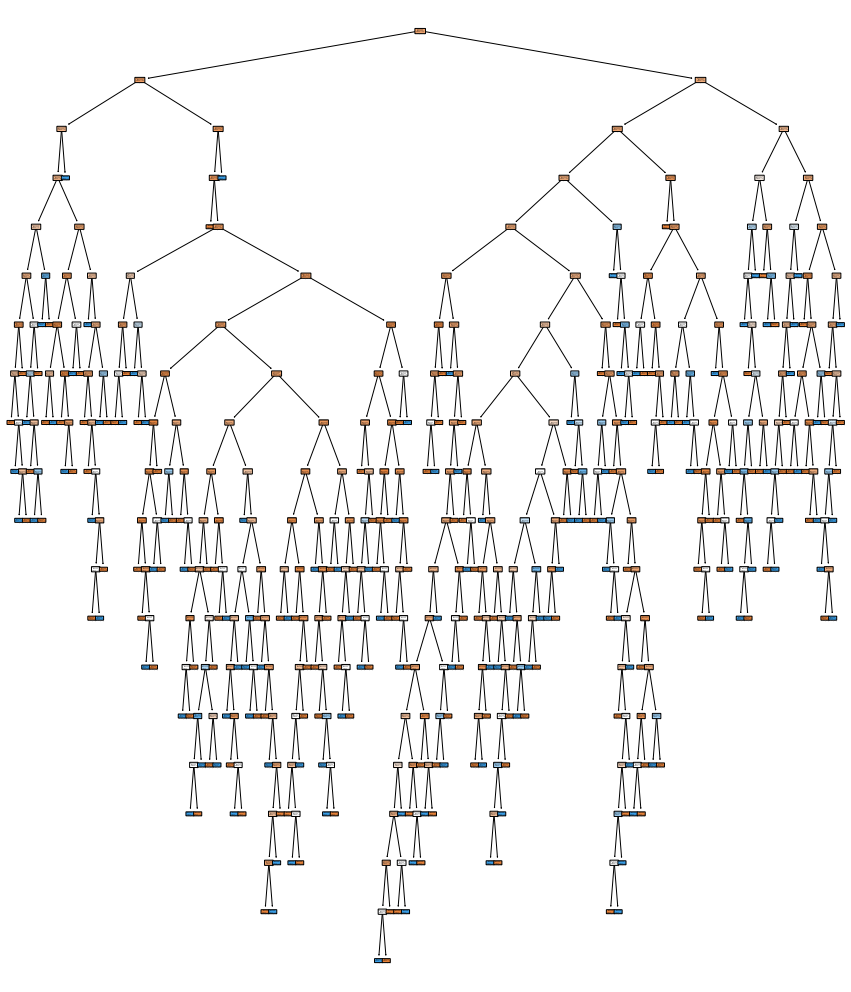

In [27]:
plt.figure(figsize=(15,18))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)